In [ ]:
from scipy import stats as st
import numpy as np
import pandas as pd

In [ ]:
df = pd.DataFrame({
    'segment': np.random.choice(['A', 'B', 'C', 'D', 'E'], size=100000),
    'metric1': np.random.normal(loc=10, scale=2, size=100000),
    'metric2': np.random.normal(loc=20, scale=3, size=100000),
    'metric3': np.random.poisson(lam=5, size=100000)
})

In [ ]:
grouped_df = df.groupby('segment')

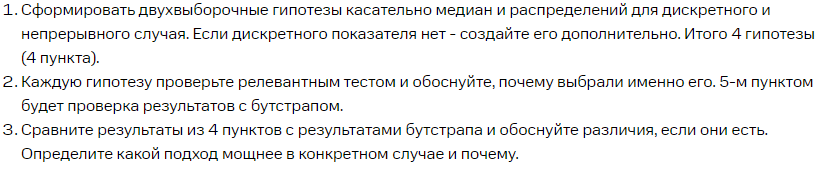

# Для непрерывного случая

Для проверки гипотезы о равенстве медиан я использую тест Уилкоксона(H0: Med(X1-X2)=0. А для проверки гипотезы о том что две выборки имеют одинаковое распределение я использую тест Колмогорова(H0: Fx(x)=Fx1(x)).

In [ ]:
st.wilcoxon(grouped_df.get_group('A')['metric1'], grouped_df.get_group('B')['metric1'][0:len(grouped_df.get_group('A')['metric1'])])

WilcoxonResult(statistic=99090131.0, pvalue=0.7250367991000233)

In [ ]:
st.kstest(grouped_df.get_group('A')['metric1'], grouped_df.get_group('B')['metric1'])

KstestResult(statistic=0.007487316561958335, pvalue=0.6272636042535238, statistic_location=10.185698194493355, statistic_sign=1)

# Для дискретного случая

Для проверки гипотезы о равенстве медиан я использую тест Уилкоксона. А для проверки гипотезы о том что две выборки имеют одинаковое распределение я использую тест Пирсона, так как тест Колмогорова может некорректно работать с дискретным распределением.

In [ ]:
st.wilcoxon(grouped_df.get_group('A')['metric3'], grouped_df.get_group('B')['metric3'][0:len(grouped_df.get_group('A')['metric3'])])

WilcoxonResult(statistic=74652202.5, pvalue=0.21942601209539425)

In [ ]:
st.pearsonr(grouped_df.get_group('A')['metric3'], grouped_df.get_group('B')['metric3'][0:len(grouped_df.get_group('A')['metric1'])])

PearsonRResult(statistic=-0.013472574137753109, pvalue=0.05713540445104696)

# Бутстрап

Проверка гипотезы равенства медиан для непрерывного случая

In [ ]:
median_lst = []
for _ in range(1000):
  a = np.random.choice(grouped_df.get_group('A')['metric1'], len(grouped_df.get_group('A')['metric1']), replace = True)
  b = np.random.choice(grouped_df.get_group('B')['metric1'], len(grouped_df.get_group('A')['metric1']), replace = True)
  median_lst.append(np.median(a)-np.median(b))
print('ДИ для медианы = [{}]'.format(np.percentile(median_lst, q = [2.5, 97.5])))
print('p-value = {}'.format(np.mean(np.array(median_lst) >= 0)))

ДИ для медианы = [[-0.0803802   0.01995342]]
p-value = 0.103


Проверка гипотезы равенства медиан для дискретного случая

In [ ]:
median_lst = []
for _ in range(1000):
  a = np.random.choice(grouped_df.get_group('A')['metric3'], len(grouped_df.get_group('A')['metric3']), replace = True)
  b = np.random.choice(grouped_df.get_group('B')['metric3'], len(grouped_df.get_group('B')['metric3']), replace = True)
  median_lst.append(np.median(a)-np.median(b))
print('ДИ для медианы = [{}]'.format(np.percentile(median_lst, q = [2.5, 97.5])))
print('p-value = {}'.format(np.mean(np.array(median_lst) >= 0)))

ДИ для медианы = [[0. 0.]]
p-value = 1.0


Мощность бутстрапа при проверке гипотезы о равенстве медиан оказалась мощнее для дискретного случая, но менее мощной для непрерывного случая. Подобный итог можно объяснить более грубыми оценками в хвостах распределения и чувствительностью к выбросам бутстрапом для непрерывного случая.


P.S. Я не очень разобрался как проверить гипотезу касательно распределений с помощью бутстрапа. Если вам будет не сложно, то прошу в комментарии к дз кратко разъяснить(или в чате) :)